##  <font color='black'>Projeto 3: Juliana Pessoa e Rodrigo Lino

##  <font color='orange'> Como a morte das mães e de seus filhos influenciam a expectativa de vida de um país?

### Introdução 
O objetivo do projeto é entender a relação das variáveis explicativas escolhidas com a variável resposta, através da regressão linear. A regressão linear é um modelo estatístico que estima o valor esperado de uma variável y dependente, em função de uma ou mais variável explicativa x. Esse modelo é ajustado através do Método dos Mínimos Quadrados, uma otimização matemática que busca minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados.

### Escolha de variáveis

#### Variável Resposta: Expectativa de Vida.

Dentre as variáveis propostas para o projeto 3, a que mais nos interessou foi expectativa de vida, pois nos pareceu relevante fazer uma associação da mesma com alguns dos objetivos do milênio.

#### Variável Explicativa 1: Taxa de Mortalidade Infantil (0-5 anos de idade, por 1000 nascimentos) no ano de 2010

A escolha dessa variável deve-se ao fato de ser um dos objetivos do milênio, o qual é reduzir a mortalidade infantil. Logo, queríamos observar a grandeza desse fator e como ele influencia na expectativa de vida de um país. 

#### Variável Explicativa 2: Taxa de Mortalidade Materna (por 100 000 nascimentos) no ano de 2010

A variável em questão foi escolhida pelo fato de, além de estar diretamente relacionada com a expectativa de vida das mulheres no país, gerando mudança na expectativa de vida geral do local, a melhora na saúde das gestantes é outro objetivo do milênio e também se relaciona com a mortalidade infantil, principalmente na morte pré-natal e neonatal.



## Pergunta: Como a mortalidade infantil e a mortalidade maternal impactam na expectativa de vida?

In [235]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R
import warnings
warnings.filterwarnings("ignore")

In [236]:
dados = pd.read_excel('base.xlsx', index_col=0)
dados.head()

,ExpVida,MorteMat,MorteInf,LNMat,LNInf
Países,,,,,
Afghanistan,53.6,500,105.0,6.214608,4.653960
Albania,77.2,21,16.6,3.044522,2.809403
Algeria,76.0,92,27.4,4.521789,3.310543
American Samoa,72.8,NaN,NaN,NaN,NaN
Andorra,84.7,NaN,3.3,NaN,1.193922


In [237]:
#Retirar NaN
dados=dados[~np.isnan(dados.ExpVida)]
dados=dados[~np.isnan(dados.MorteMat)]
dados=dados[~np.isnan(dados.MorteInf)]
dados=dados[~np.isnan(dados.LNMat)]
dados=dados[~np.isnan(dados.LNInf)]

dados.shape

(183, 5)

## Comparação das variáveis explicativas com a variável resposta

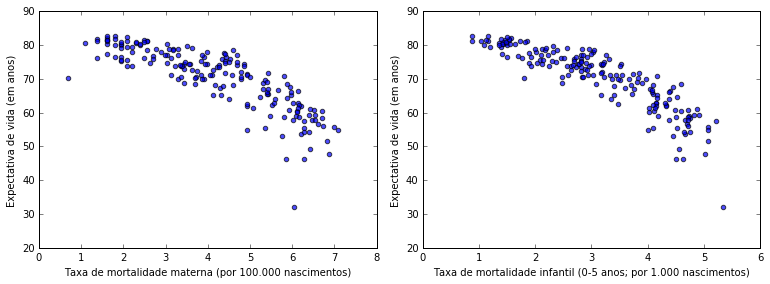

In [238]:
f, ax = plt.subplots(1,2,figsize=(11,4))

ax[0].scatter(dados.LNMat, dados.ExpVida, alpha=0.7)
ax[0].set_xlabel("Taxa de mortalidade materna (por 100.000 nascimentos)")
ax[0].set_ylabel("Expectativa de vida (em anos)")

ax[1].scatter(dados.LNInf, dados.ExpVida, alpha=0.7)
ax[1].set_xlabel("Taxa de mortalidade infantil (0-5 anos; por 1.000 nascimentos)")
ax[1].set_ylabel("Expectativa de vida (em anos)")

plt.tight_layout(1)

## Análise Descritiva

In [239]:
dados.corr(method='pearson')

,ExpVida,MorteMat,MorteInf,LNMat,LNInf
ExpVida,1.000000,-0.795424,-0.886625,-0.832714,-0.881195
MorteMat,-0.795424,1.000000,0.901324,0.825951,0.791791
MorteInf,-0.886625,0.901324,1.000000,0.835249,0.885422
LNMat,-0.832714,0.825951,0.835249,1.000000,0.942188
LNInf,-0.881195,0.791791,0.885422,0.942188,1.000000


## Gráfico 3D das variáveis

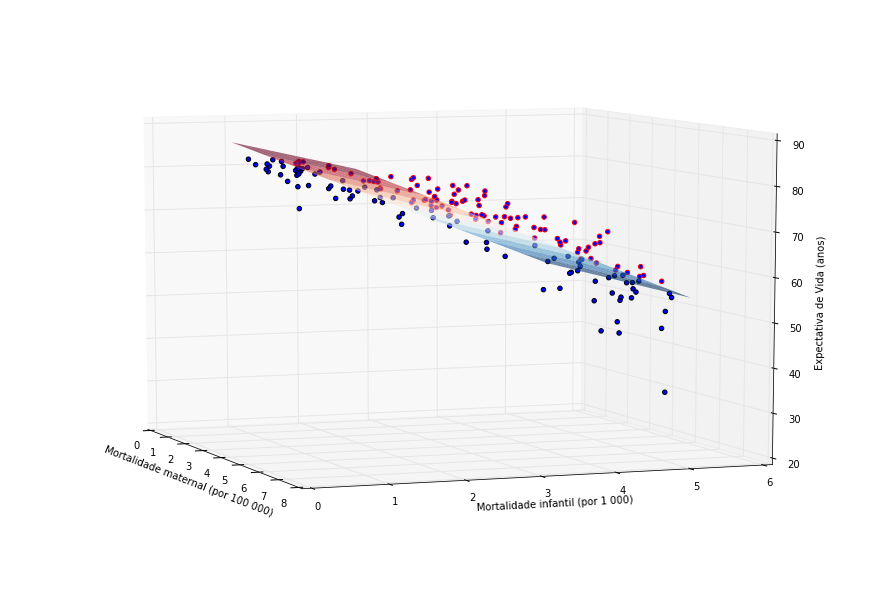

In [240]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['LNMat', 'LNInf']]
y = dados['ExpVida']

## fit a OLS model with intercept on TV and Radio
X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.LNMat.min(), X.LNMat.max(), 100), 
                       np.linspace(X.LNInf.min(), X.LNInf.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-21, elev=8)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNMat, X[resid >= 0].LNInf, y[resid >= 0], color='r', alpha=1.0, facecolor='r')
ax.scatter(X[resid < 0].LNMat, X[resid < 0].LNInf, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Mortalidade maternal (por 100 000)')
ax.set_ylabel('Mortalidade infantil (por 1 000)')
ax.set_zlabel('Expectativa de Vida (anos)')

## Modelo de Regressão Linear Múltipla

In [241]:
formula = 'ExpVida ~ LNMat + LNInf'
results = sm.ols(formula, data=dados).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     312.8
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.66e-59
Time:                        20:50:59   Log-Likelihood:                -526.31
No. Observations:                 183   AIC:                             1059.
Df Residuals:                     180   BIC:                             1068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     91.9949      0.927     99.220      0.000        90.165    93.824
LNMat         -0.1240      0.595     -0.209      0.835        -1.297     1.049
LNInf         -6.8054      0.832     -8.184      0.000        -8.446    -5.165
==============================================================================
Omnibus:                       53.950   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.672
Skew:                          -1.166   Prob(JB):                     1.43e-37
Kurtosis:                       7.100   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é uma medida descritiva da qualidade do ajuste obtido. Ele é utilizado como a quantidade na variabilidade dos dados que é explicada pelo modelo de regressão ajustado. No entanto, o valor do coeficiente de determinação depende do número de observações n, e tende a crescer quanto menor for o n.

De acordo coma  regressão linear descrita acima, tem-se que as mortalidades infantil e materna são inversamente proporcionais à expectativa de vida. Ou seja, para 1% que se aumenta a mortalidade infantil, se diminui cerca de 7 anos da expectativa de vida. 

## DataFrame com o subgrupo "Salário anual per capita"

In [242]:
dados1= pd.read_excel('base2.xlsx', index_col=0)
dados1=dados1[~np.isnan(dados1.LNInc)]

In [243]:
result = pd.concat([dados, dados1], axis=1, join="inner")
result.head()

,ExpVida,MorteMat,MorteInf,LNMat,LNInf,LNInc,Inc
Países,,,,,,,
Afghanistan,53.6,500,105.0,6.214608,4.653960,7.400621,1637
Albania,77.2,21,16.6,3.044522,2.809403,9.145695,9374
Algeria,76.0,92,27.4,4.521789,3.310543,9.433004,12494
Angola,57.6,530,182.5,6.272877,5.206750,8.860357,7047
Argentina,75.8,76,14.6,4.330733,2.681022,9.665548,15765


## Salário anual per capita <= que cerca de 8150 dólares (ln 8150 ≅ 9)

In [244]:
#Salário crítico: ln salário = 9 dólares por ano

sc = 9

d1 = pd.DataFrame()
d1['ExpVida']=result[result.LNInc <= sc].ExpVida
d1['LNMat']=result[result.LNInc <= sc].LNMat
d1['LNInf']=result[result.LNInc <= sc].LNInf

x = d1['ExpVida']
y = d1['LNInf']
z = d1['LNMat']


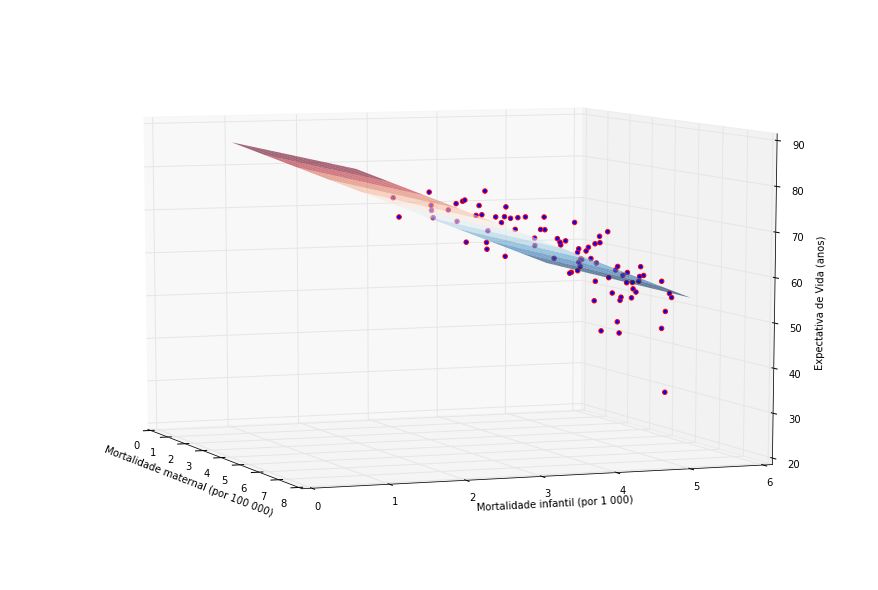

In [245]:
X = dados[['LNMat', 'LNInf']]
y = dados['ExpVida']


## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.LNMat.min(), X.LNMat.max(), 100), 
                       np.linspace(X.LNInf.min(), X.LNInf.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-21, elev=8)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
#resid = Y - est.predict(X)
ax.scatter(d1['LNMat'], d1['LNInf'], d1['ExpVida'], color='r', alpha=1.0, facecolor='r')


# set axis labels
ax.set_xlabel('Mortalidade maternal (por 100 000)')
ax.set_ylabel('Mortalidade infantil (por 1 000)')
ax.set_zlabel('Expectativa de Vida (anos)')

## Salário anual per capita > que cerca de 8150 dólares (ln 8150 ≅ 9)

In [246]:
d2 = pd.DataFrame()
d2['ExpVida']=result[result.LNInc > sc].ExpVida
d2['LNInf']=result[result.LNInc > sc].LNInf
d2['LNMat']=result[result.LNInc > sc].LNMat

a = d2['ExpVida']
b= d2['LNInf']
c = d2['LNMat']

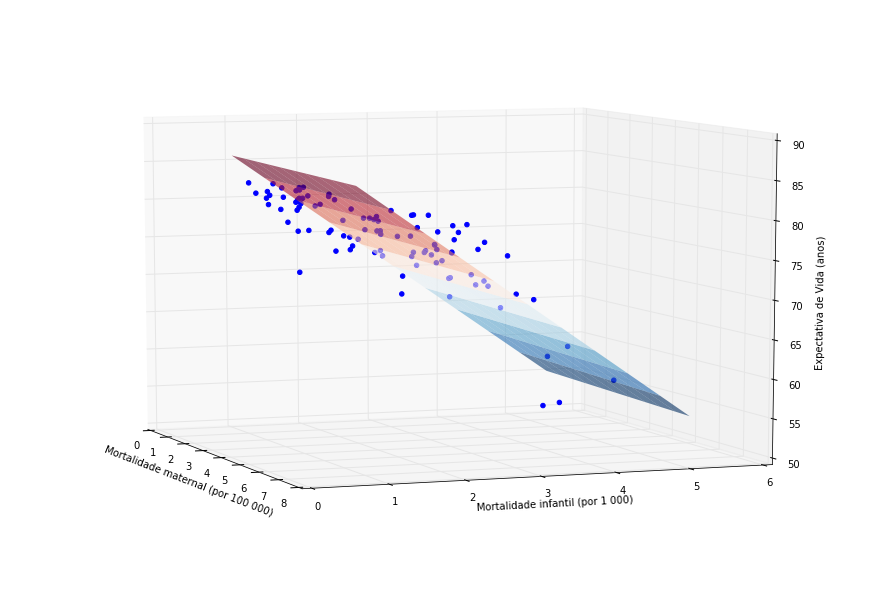

In [247]:
X = dados[['LNMat', 'LNInf']]
y = dados['ExpVida']

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.LNMat.min(), X.LNMat.max(), 100), 
                       np.linspace(X.LNInf.min(), X.LNInf.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-21, elev=8)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
#resid = Y - est.predict(X)
ax.scatter(d2['LNMat'], d2['LNInf'], d2['ExpVida'], color='b', alpha=1.0, facecolor='b')


# set axis labels
ax.set_xlabel('Mortalidade maternal (por 100 000)')
ax.set_ylabel('Mortalidade infantil (por 1 000)')
ax.set_zlabel('Expectativa de Vida (anos)')

## Conclusão

Após a análise dos resultados inferenciais obtidos, relacionando as variáveis expectativa de vida e mortalidades infantil e materna através do modelo de regressão linear múltipla, conclui-se que a mortalidade infantil tem uma significativa relação com a expectativa de vida. Entretanto, não se pode concluir que a mesma também estabelece uma relação considerável com a mortalidade materna.

Além disso, criamos dois subgrupos em função de um salário anual per capita de cerca de 8150 dólares (logaritmo natural = 9). Obtivemos então dois modelos para análise: países com salário menor e países com salário maior que o salário crítico escolhhido. Através dos resultados desses modelos, concluímos que o modelo global é razoável para estimar os valores locais, visto que abrange de forma considerável esses valores obtidos de y em função de x.

Esse projeto foi importante para o aprendizado de regressão linear múltipla como ferramenta da inferência estatística. Por fim, conclui-se o ciclo de aprendizado da ciência estatística aplicada ao curso de Ciência dos Dados. 